# Sensorless Motor Diagnosis EDA and Modeling
Oleh : [enricoroselino](https://www.linkedin.com/in/enricoroselino/)

Dataset : [Sensorless Motor Diagnosis](https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis#)

Tujuan :
* Membuat model yang dapat mendiagnosa kerusakan motor dengan keluaran arus listrik penggerak motor.

Masalah :
* Multiclass classification dengan 11 jenis kerusakan.

Kesimpulan

* Dapat disimpulkan dengan memilih hampir setengah dari jumlah feature yang ada, Random Forest tidak memakan waktu yang lama untuk training dan menggunakan hyperparameter yang simpel. Model ini sangat andal ddan mendapatkan f1 score : 99.66% pada data test.

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from fast_ml.model_development import train_valid_test_split

%matplotlib inline
sns.set()

In [2]:
path = os.path.join("dataset", "Sensorless_drive_diagnosis.txt")

In [3]:
column_names = []
for i in range(48):
    column_names.append("feature_" + str(i+1))
column_names.append("label")

In [4]:
motor_df = pd.read_csv(path, header=None, sep=" ", names=column_names)

## Explore Data

In [5]:
motor_df.shape

(58509, 49)

In [6]:
motor_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,label
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


In [7]:
motor_df.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,58509.0,-3.332852e-06,0.000072,-0.013721,-0.000007,-2.652600e-06,0.000002,0.005784
feature_2,58509.0,1.439648e-06,0.000056,-0.005414,-0.000014,8.804600e-07,0.000019,0.004525
feature_3,58509.0,1.412013e-06,0.000235,-0.013580,-0.000072,5.137700e-07,0.000075,0.005238
feature_4,58509.0,-1.312815e-06,0.000063,-0.012787,-0.000005,-1.059100e-06,0.000004,0.001453
feature_5,58509.0,1.351239e-06,0.000057,-0.008356,-0.000015,7.540200e-07,0.000019,0.000825
feature_6,58509.0,-2.654483e-07,0.000226,-0.009741,-0.000074,-1.659300e-07,0.000071,0.002754
feature_7,58509.0,1.914585e-03,0.036468,-0.139890,-0.019927,1.322600e-02,0.024770,0.069125
feature_8,58509.0,1.913146e-03,0.036465,-0.135940,-0.019951,1.323000e-02,0.024776,0.069130
feature_9,58509.0,1.911733e-03,0.036470,-0.130860,-0.019925,1.324700e-02,0.024777,0.069131
feature_10,58509.0,-1.189731e-02,0.066482,-0.218640,-0.032144,-1.556600e-02,0.020614,0.352580


### Visualisasi Data

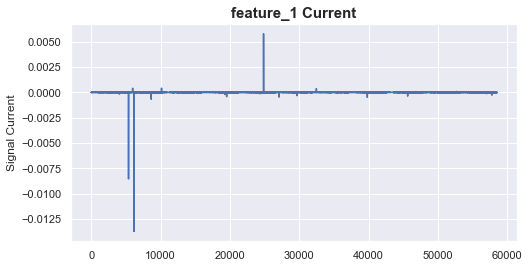

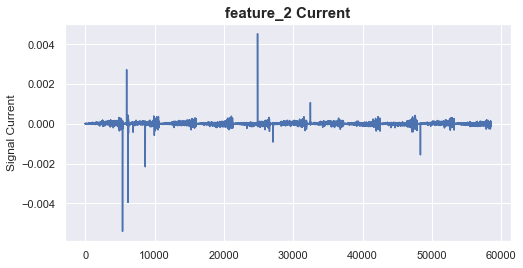

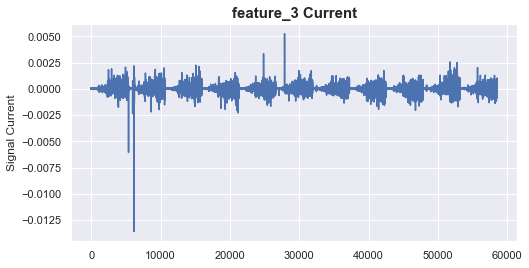

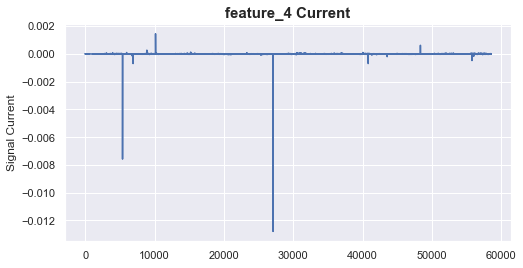

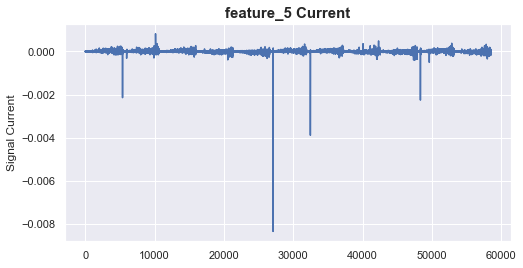

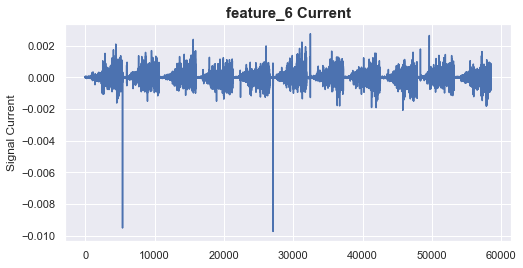

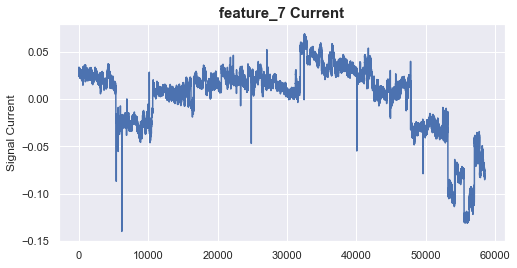

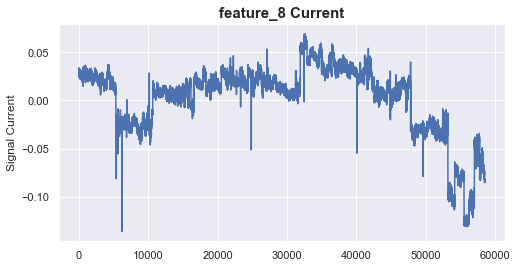

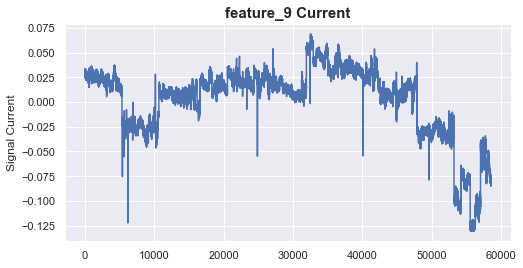

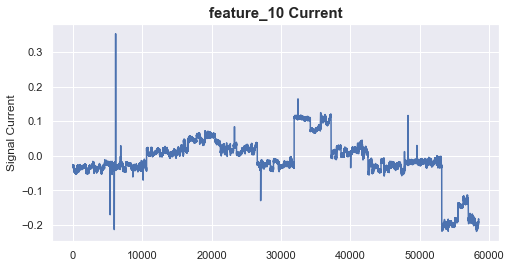

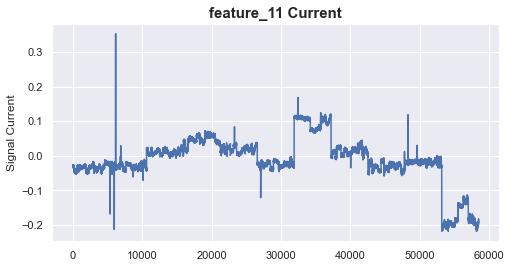

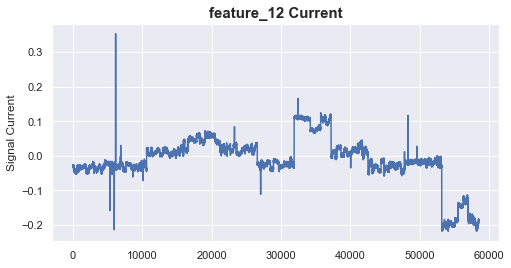

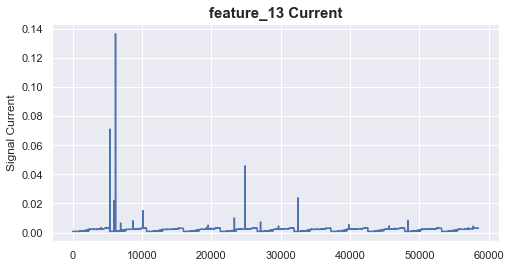

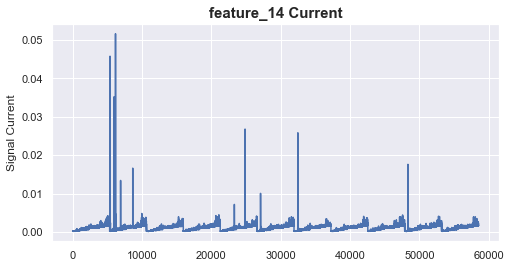

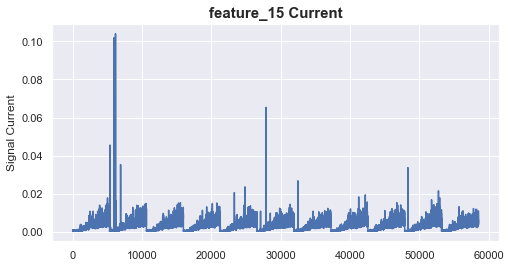

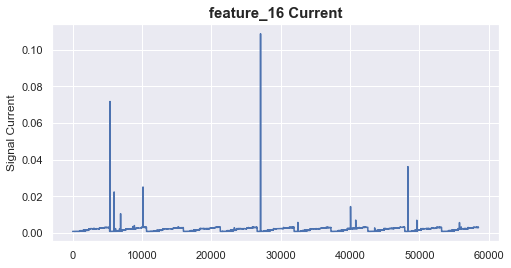

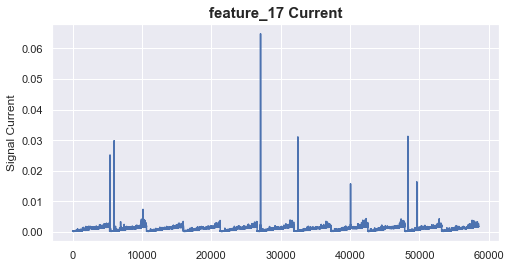

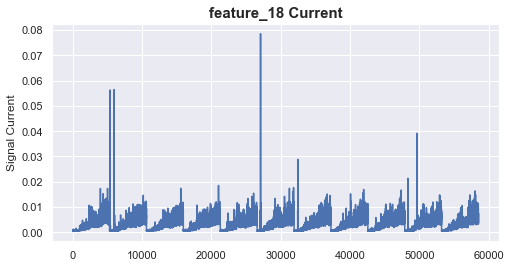

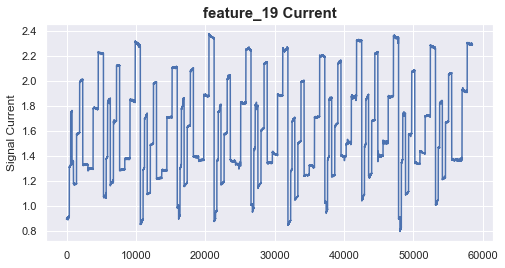

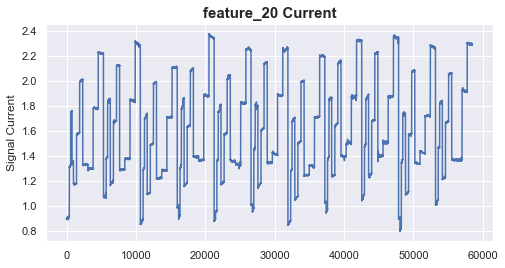

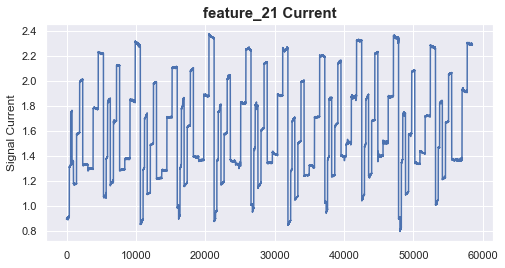

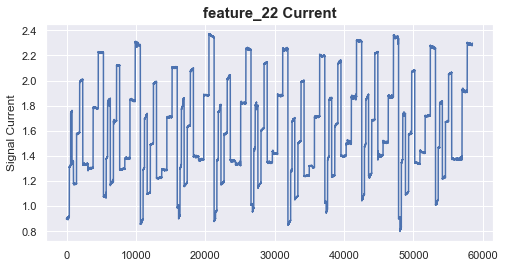

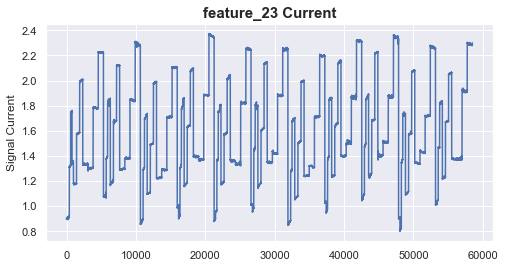

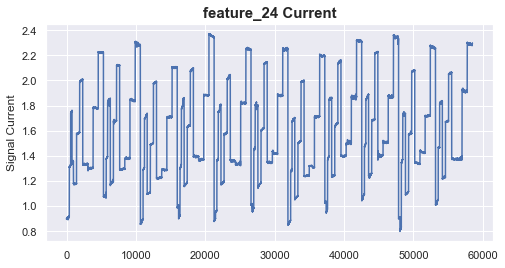

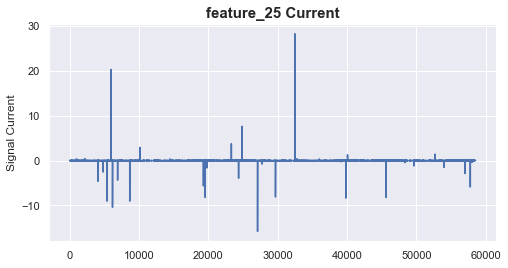

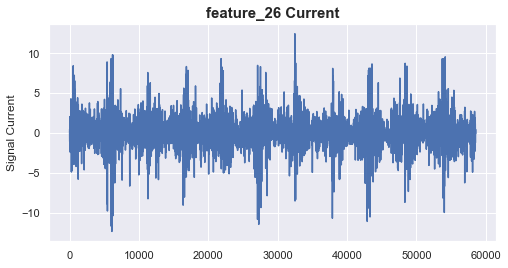

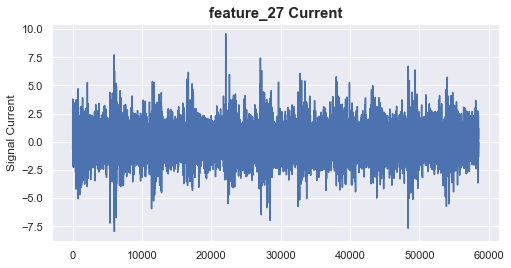

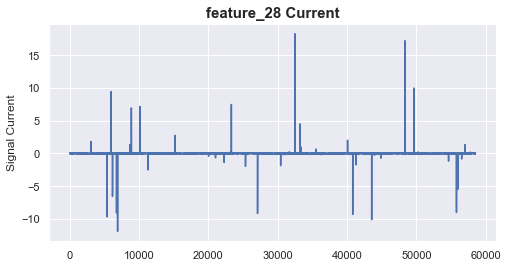

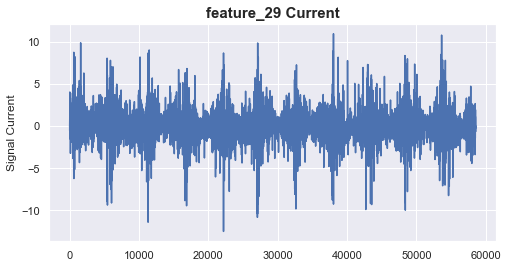

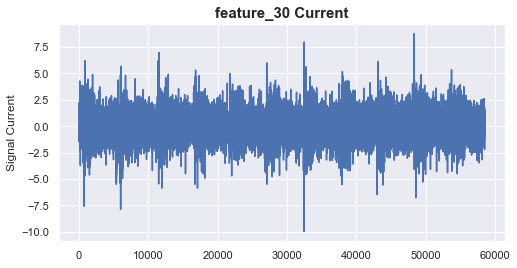

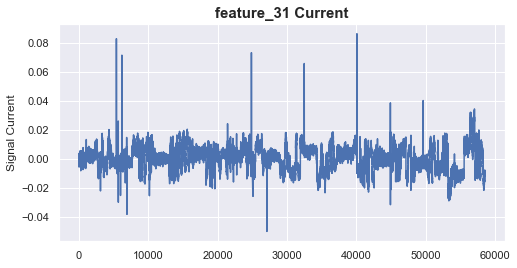

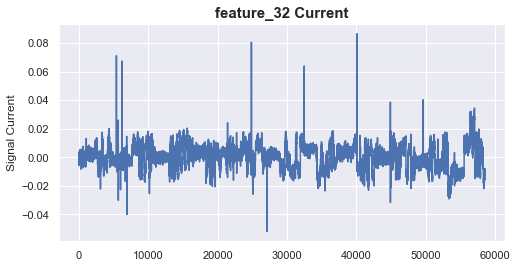

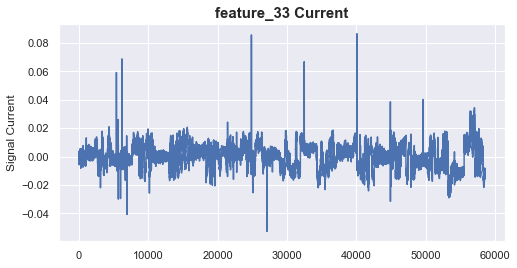

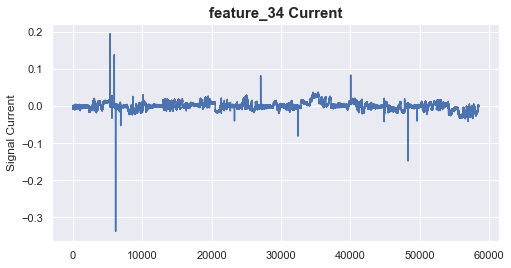

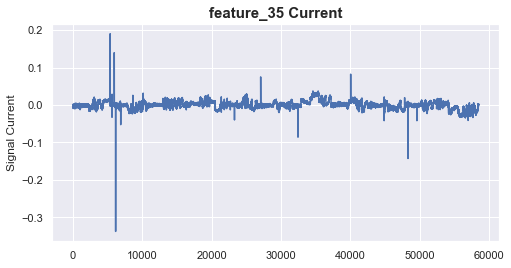

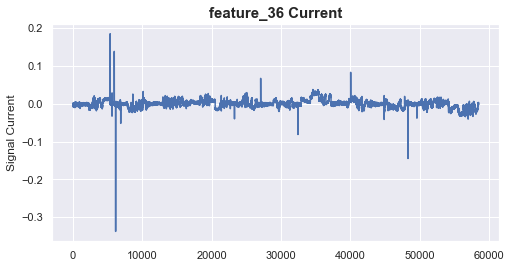

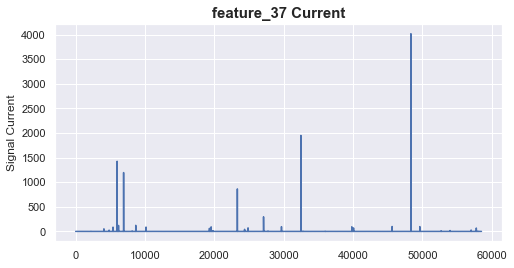

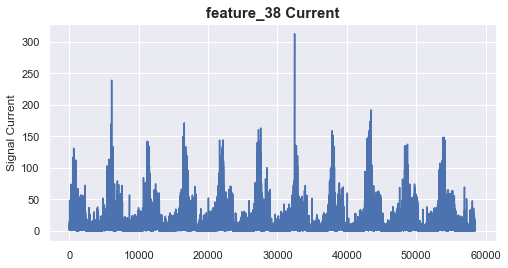

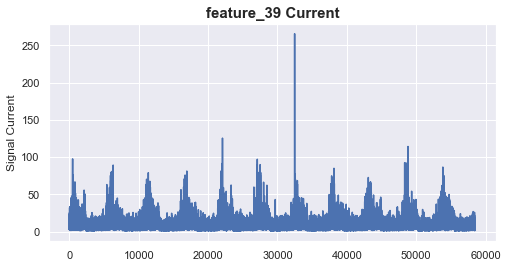

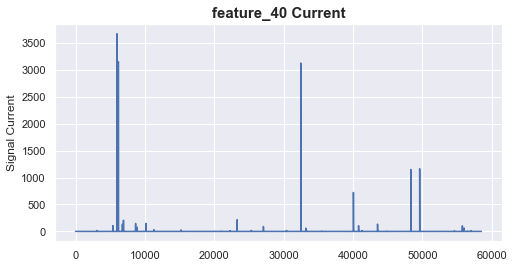

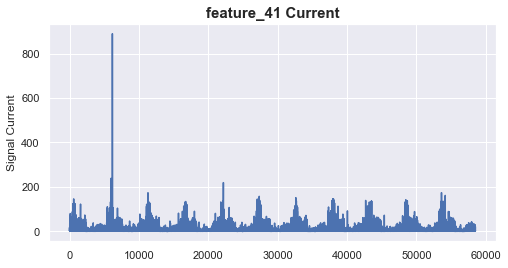

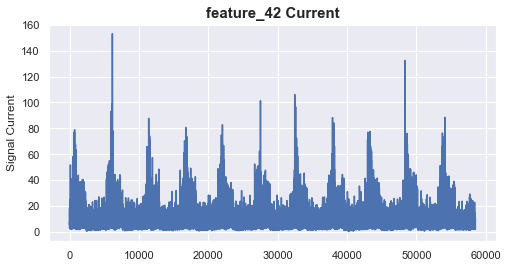

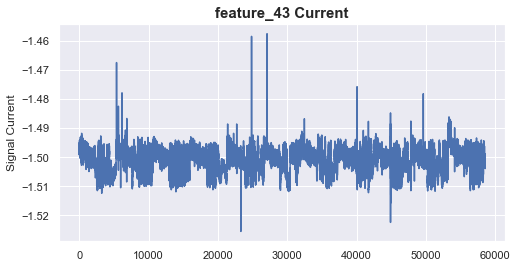

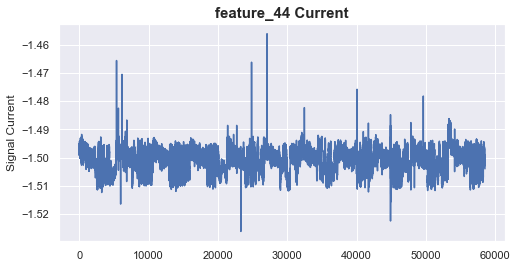

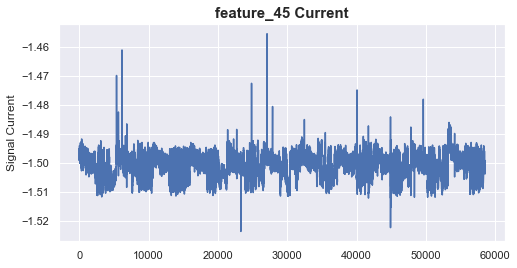

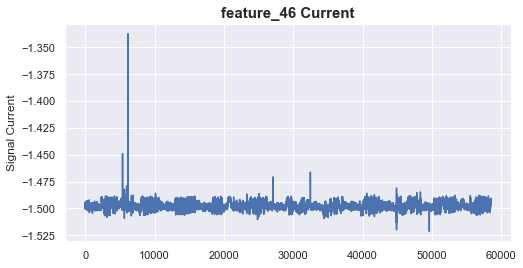

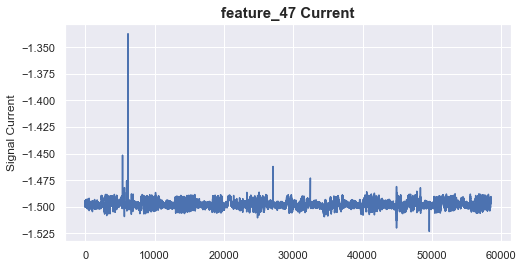

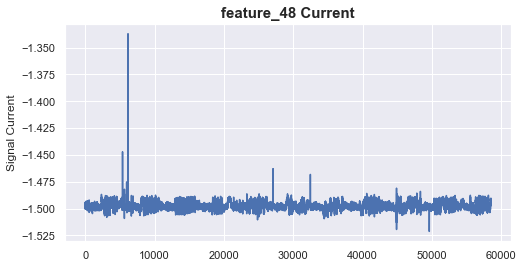

In [8]:
for i in column_names :
    if i != "label" :
        plt.figure(figsize=(8,4))
        plt.title(
            "{} Current".format(i),
            fontweight="bold",
            size=15
        )
        plt.plot(motor_df[i])
        plt.ylabel("Signal Current")
        plt.show()

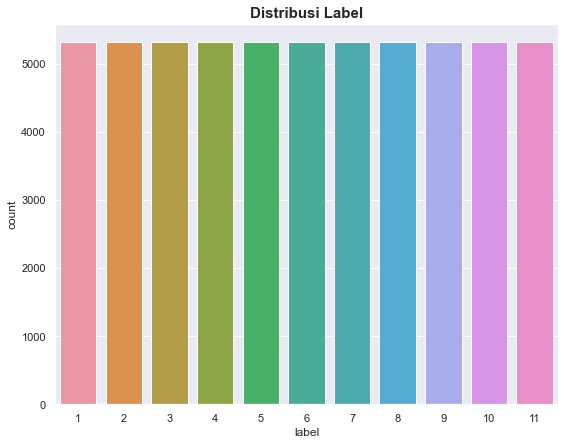

In [9]:
plt.figure(figsize=(9, 7))
sns.countplot(
    x= "label",
    data= motor_df
)

plt.title("Distribusi Label",
    loc="center",
    fontweight="bold",
    size=15
)

plt.show()

### Correlation Check

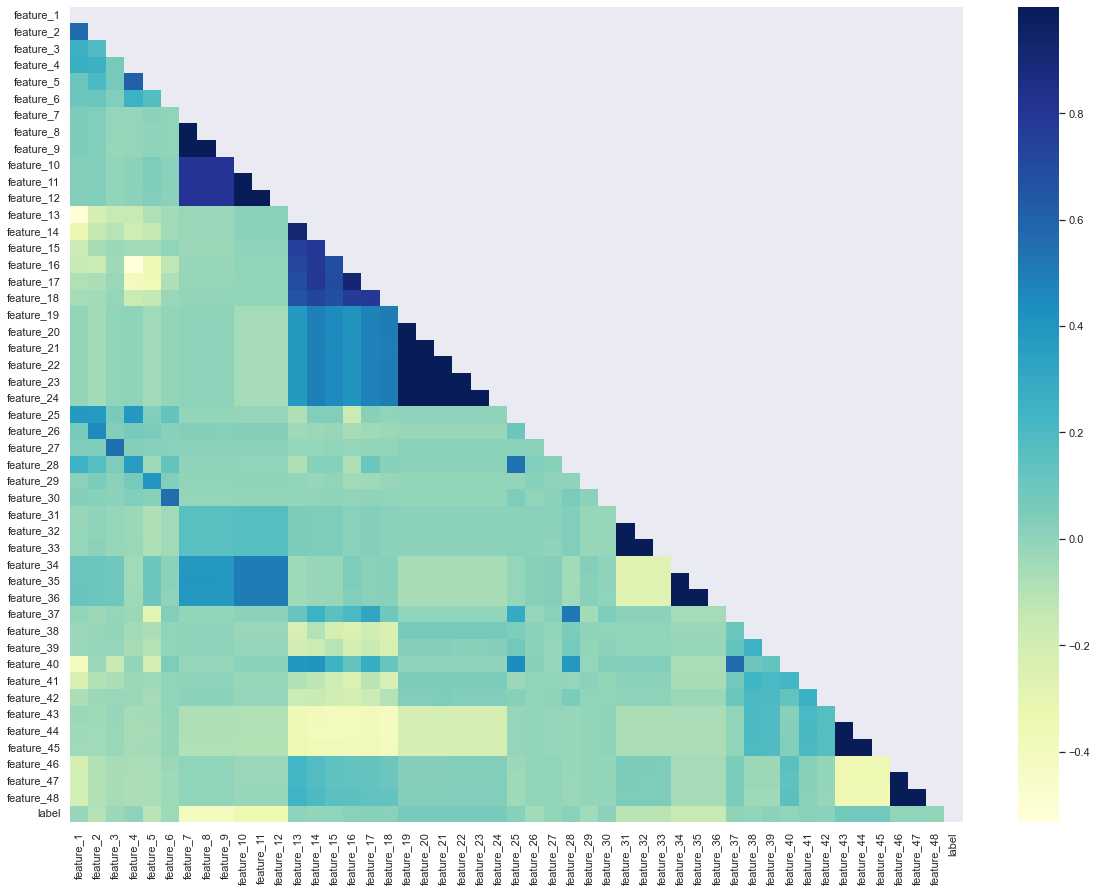

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(motor_df.corr(), annot=False, cmap="YlGnBu", mask=np.triu(motor_df.corr()))
plt.show()

In [11]:
corr_matrix = motor_df.corr().abs()

In [12]:
to_pick_hicorr = corr_matrix.unstack()["label"].sort_values(kind="quicksort", ascending=False)

In [13]:
to_pick_hicorr

label         1.000000
feature_7     0.407439
feature_8     0.407312
feature_9     0.407069
feature_10    0.340275
feature_11    0.340194
feature_12    0.340086
feature_34    0.153816
feature_36    0.153579
feature_35    0.153533
feature_33    0.118320
feature_31    0.118155
feature_32    0.117675
feature_5     0.110669
feature_2     0.098850
feature_45    0.081956
feature_44    0.081503
feature_43    0.080970
feature_21    0.062139
feature_20    0.062117
feature_19    0.062109
feature_24    0.061153
feature_23    0.061140
feature_22    0.061139
feature_26    0.048018
feature_29    0.046241
feature_6     0.035783
feature_3     0.030237
feature_25    0.022642
feature_17    0.021232
feature_1     0.017853
feature_18    0.017817
feature_28    0.015957
feature_41    0.013720
feature_16    0.012257
feature_42    0.011424
feature_39    0.010056
feature_30    0.007787
feature_14    0.007374
feature_38    0.007184
feature_27    0.006269
feature_48    0.005974
feature_4     0.005692
feature_15 

In [14]:
high_corr= to_pick_hicorr[to_pick_hicorr > 0.05]

In [15]:
motor_df = motor_df[high_corr.index.tolist()]

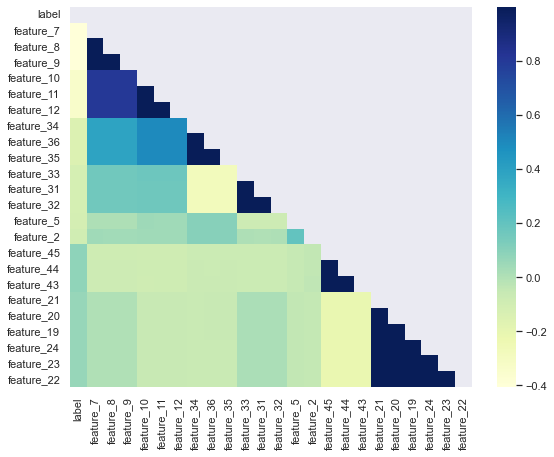

In [16]:
plt.figure(figsize=(9,7))
sns.heatmap(motor_df.corr(), annot=False, cmap="YlGnBu", mask=np.triu(motor_df.corr()))
plt.show()

Hasil pemilihan feature terhadap label

### Missing Value Checking

In [17]:
check_missing = motor_df.isnull().sum() * 100 / motor_df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

Tidak ada data yang hilang / tidak sesuai jadi tidak perlu ditindaklanjuti

In [18]:
motor_df.to_csv(os.path.join("dataset", "selected_features.csv"), index=False)

# FEATURE SCALING AND TRANSFORMATION

### Data Split

In [19]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(motor_df, target = 'label', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1, random_state=42)

### Standardization

In [20]:
numerical_cols = X_train.columns.tolist()

In [21]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.fit_transform(X_valid[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

In [22]:
X_train.head()

,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_34,feature_36,feature_35,feature_33,...,feature_2,feature_45,feature_44,feature_43,feature_21,feature_20,feature_19,feature_24,feature_23,feature_22
1111,0.628616,0.628529,0.630244,-0.320060,-0.319796,-0.320658,-0.694660,-0.697883,-0.691279,0.769823,...,0.092775,-0.331181,-0.298869,-0.306277,-1.089804,-1.090073,-1.090150,-1.097646,-1.097878,-1.097950
53942,-2.948951,-2.949084,-2.948113,-2.948852,-2.948950,-2.949052,0.317951,0.318208,0.319295,-1.300802,...,-0.004762,0.854684,0.875843,0.871441,0.546217,0.544840,0.544651,0.539234,0.537843,0.537664
6084,-0.674486,-0.674430,-0.674821,-0.213922,-0.213820,-0.214058,0.328185,0.329626,0.329387,-0.504172,...,-0.068835,0.496167,0.520697,0.515387,0.594747,0.593602,0.593410,0.589468,0.588057,0.587875
54427,-2.128334,-2.128199,-2.127093,-2.787087,-2.786725,-2.786367,-2.148334,-2.141419,-2.144176,-1.509624,...,-0.167767,-0.110555,-0.080318,-0.087166,-0.985238,-0.985797,-0.985881,-0.979093,-0.979373,-0.979453
28737,0.329907,0.330904,0.330209,-0.409356,-0.409323,-0.407691,-0.041711,-0.030334,-0.039280,0.167203,...,-0.651353,-0.331181,-0.326187,-0.333666,1.324202,1.323036,1.323044,1.319119,1.318671,1.318692


## Machine Learning Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

### Random Forest

#### Model

In [24]:
rfc = RandomForestClassifier(max_depth=18, random_state=42, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_jobs=-1, random_state=42)

#### Analyze Random Forest

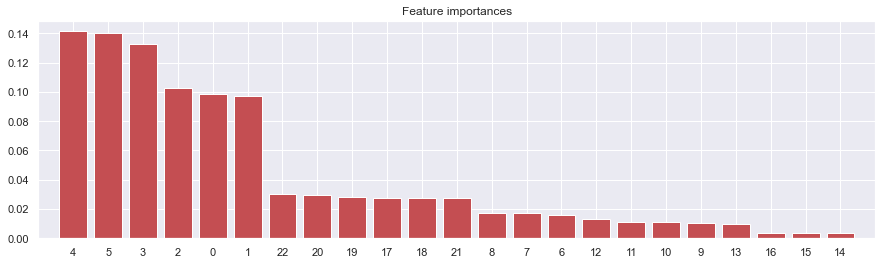

In [25]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(15,4))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
    color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [26]:
val_result = rfc.predict(X_valid)

In [27]:
f1 = f1_score(list(y_valid), val_result, average="weighted")
print(f1*100)

99.75215124302656


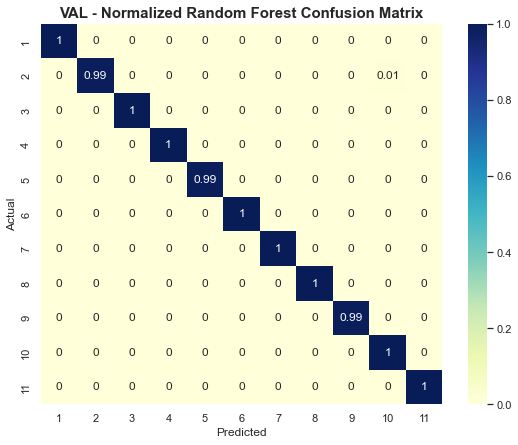

In [28]:
cm = confusion_matrix(list(y_valid), val_result)
cm_norm = np.round(cm / np.sum(cm, axis=1).reshape(-1,1), 2)
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_norm, 
    cmap="YlGnBu", 
    annot=True,
    xticklabels=np.sort(motor_df["label"].unique()),
    yticklabels=np.sort(motor_df["label"].unique())
)
plt.title("VAL - Normalized Random Forest Confusion Matrix",
    loc="center",
    fontweight="bold",
    size=15
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
print(classification_report(list(y_valid), val_result))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1083
           2       1.00      0.99      1.00      1069
           3       1.00      1.00      1.00      1071
           4       1.00      1.00      1.00      1040
           5       1.00      0.99      1.00      1014
           6       1.00      1.00      1.00      1046
           7       1.00      1.00      1.00      1102
           8       1.00      1.00      1.00      1050
           9       1.00      0.99      1.00      1039
          10       0.99      1.00      0.99      1073
          11       1.00      1.00      1.00      1115

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702



## TEST DATA TIME!

### Random Forest

In [30]:
test_result = rfc.predict(X_test)

In [31]:
f1 = f1_score(list(y_test), test_result, average="weighted")
print(f1*100)

99.65820545625151


In [32]:
print(classification_report(list(y_test), test_result))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       534
           2       1.00      0.99      0.99       577
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       537
           5       1.00      1.00      1.00       564
           6       1.00      1.00      1.00       562
           7       1.00      1.00      1.00       528
           8       1.00      1.00      1.00       505
           9       1.00      0.99      0.99       488
          10       0.98      1.00      0.99       520
          11       1.00      1.00      1.00       536

    accuracy                           1.00      5851
   macro avg       1.00      1.00      1.00      5851
weighted avg       1.00      1.00      1.00      5851



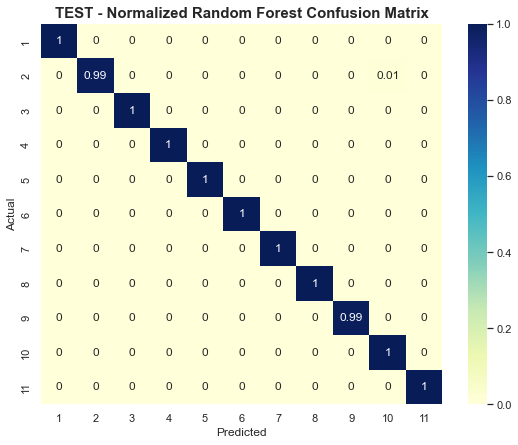

In [33]:
cm = confusion_matrix(list(y_test), test_result)
cm_norm = np.round(cm / np.sum(cm, axis=1).reshape(-1,1), 2)
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_norm, 
    cmap="YlGnBu", 
    annot=True,
    xticklabels=np.sort(motor_df["label"].unique()),
    yticklabels=np.sort(motor_df["label"].unique())
)
plt.title("TEST - Normalized Random Forest Confusion Matrix",
    loc="center",
    fontweight="bold",
    size=15
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Kesimpulan

* Dapat disimpulkan dengan memilih hampir setengah dari jumlah feature yang ada, Random Forest tidak memakan waktu yang lama untuk training dan menggunakan hyperparameter yang simpel. Model ini sangat andal ddan mendapatkan f1 score : 99.66% pada data test.

In [34]:
!jupyter-nbconvert --to PDFviaHTML sensorless-motor-diagnosis.ipynb

[NbConvertApp] Converting notebook sensorless-motor-diagnosis.ipynb to PDFviaHTML
[NbConvertApp] Writing 2875375 bytes to sensorless-motor-diagnosis.pdf
